텐서플로우는 두 요소로 구성
- 그래프 프로토콜 버퍼
- 분산된 그래프를 실행하는 런타임

여러 CPU와 GPU에서 구현  
먼저 최고수준의 API로 시작하여 모든 작업을 실행하는 것이 좋음
특별한 모델링 문제를 해결하기 위해 더 유연한 추상화가 필요하면 한 수준 아래로 이동  

## tf.estimator API

단기집중과정 내 대부분의 실습에서 사용, 낮은 수준의 텐서플로우를 사용해도 실습의 모든 작업을 실행할 수 있지만 tf.estimator를 사용하면 코드 행 수가 크게 줄어듦  
tf.estimator는 scikit-learn API와 호환

if.estimator로 구현된 선형 회구 프로그램의 형식을 대체로 다음과 같다.

In [ ]:
import tensorflow as tf

# Set up a linear classifier.
classifier = tf.estimator.LinearClassifier()

# Train the model on some example data.
classifier.train(input_fn=train_input_fn, steps=2000)

# Use it to predict.
predictions = classifier.predict(input_fn=predict_input_fn)

# intro_to_Pandas

다음 행은 Pandas API를 가져와서 API버전을 출력합니다

In [2]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.0.5'

Pandas의 기본 데이터 구조는 두 가지 클래스로 구현
- DataFrame은 행 및 이름 지정된 열이 포함된 관계형 데이터 테이블
- Serise는 하나의 열, DataFrame에는 하나 이상의 Serise와 각 Serise의 이름이 포함

데이터 프레임은 데이터 조작에 일반적으로 사용하는 추상화

Series를 만드는 한 가지 방법은 Serise 객체를 만드는 것

In [4]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

DataFrame 객체는 string 열이름과 매핑되는 'dict'를 각각의 Series에 전달하여 만들 수 있음  
Series의 길이가 일치하지 않는 경우, 누락된 값은 특수 NA/NaN값으로 채워짐

In [5]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({'City name': city_names, 'Population': population})

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


대부분의 경우 전체 파일을 DataFrame으로 로드

In [6]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


discribe를 이용한 DataFrame에 관한 통계

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E644DDB160>]],
      dtype=object)

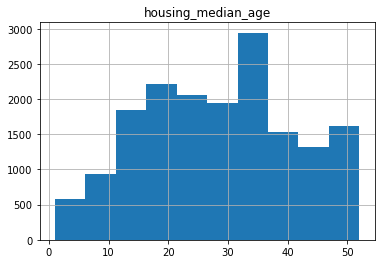

In [7]:
california_housing_dataframe.hist('housing_median_age')

DataFrame.hist -> 한 열에서 값의 분포를 빠르게 검토 가능

In [10]:
cities = pd.DataFrame({'City name': city_names, 'Population': population})
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [11]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [12]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In [16]:
population / 1000

0     852.469
1    1015.785
2     485.199
dtype: float64

In [17]:
import numpy as np
np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

In [19]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

In [22]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


# ## 실습 #1

다음 두 명제 *모두* True인 경우에만 True인 새 부울 열을 추가하여 `도시` 테이블을 수정합니다.

  * 도시 이름은 성인의 이름을 본따서 지었다.
  * 도시 면적이 130제곱킬로미터보다 넓다.

**참고:** 부울 `Series`는 기존 부울 연산자가 아닌 비트 연산자를 사용하여 결합할 수 있습니다. 예를 들어 *logical and*를 실행할 때 `and` 대신 `&`를 사용합니다.

**참고:** 스페인어에서 "San"은 "성인"의 의미입니다.

In [28]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False
